<h1 align=center> FINAL CAPSTONE PROJECT </h1> 

Project to explore the differences in how developed and developing countries spend their money on 
<li> We will mainily compare expenditure as percentage of GDP. We will compare the following sectors:</li>
<ul>
    <li> 1. Education </li>
    <li> 2. Health</li>
    <li> 3. Food and Agriculture</li> 
    <li> 4. Housing and Community</li> 
    <li> 5. Energy and Environment</li>
    <li> 6. Transportation</li>
    <li> 7. Military</li> 
    <li> 8. Science and technology</li> 
    <li> 9. Social security, unemployment and labour</li> 
    <li> 10. Internatinal affairs </li> 
    </ul>

In [1]:
# Import libraries 
import numpy as np
import os 

from bs4 import BeautifulSoup # library for webscrapping 
import requests # library for requests 

import pandas as pd # library for data analysis 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# Matplotlib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from matplotlib import pyplot
# Visualization package: seaborn
import seaborn as sns
%matplotlib inline

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # library for rendering maps 

#!conda install -c conda-forge geopy
#from geopy.geocoders import Nominatim # convert address into latitude abd longitude 

# import json files 
import json 
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe  


# import linear regression modules 
from sklearn.linear_model import LinearRegression 

# 

print('Libraries imported') 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\wn236\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be UPDATED:

  anaconda                                    custom-py37_1 --> 2018.12-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.9.1~ --> pkgs/main::ca-certificates-2018.03.07-0
  certifi             conda-forge::certifi-2019.6.16-py37_1 --> pkgs/main::certifi-2018.11.29-py37_0
  openssl            conda-forge::openssl-1.1.1c-hfa6e2cd_0 --> pkgs/main::openssl-1.1.1a-he774522_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Libraries imported


<h3 allign=center> Importing Datasets </h3>  
<li> 1. Countries details </li> 

In [3]:
# Import datafiles 

# countries
data = 'C:\\Users\\wn236\\Data_science\\Final_project\\Countries.xlsx'

# agriculture
data1 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Agriculture.xls'

# education
data2 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Education.xls'

# expenses
data3 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Expenses.xls'

# exports
data4 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Exports.xls'

# health
data5 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Health.xls'

# imports
data6 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Imports.xls'

# industry
data7 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Industry.xls'

# military
data8 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Military.xls'

# research_innovation
data9 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Research_Innovation.xls'

# trade  
data10 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Trade.xls'

#coordinates 
data11 = 'C:\\Users\\wn236\\Data_science\\Final_project\\Coordinates.xls'

In [4]:
# convert files to pandas 

# countries
countries = pd.read_excel (data)

# agriculture
agriculture = pd.read_excel (data1)

# education
education = pd.read_excel (data2)

# expenses
expenses = pd.read_excel (data3)

# exports
exports = pd.read_excel (data4)

# health
health = pd.read_excel (data5)

# imports
imports = pd.read_excel (data6)

# industry
industry = pd.read_excel (data7)

# military
military = pd.read_excel (data8)

# research_innovation
research = pd.read_excel (data9)

# trade  
trade = pd.read_excel (data10)

# coordinates  
coordinates = pd.read_excel (data11)

In [6]:
# rename coordinates 
coordinates.rename(columns={'name':'Country Name'}, inplace=True)

In [7]:
# check that all the files have been uploaded properly
countries.head(5)

,Country Code,Region,IncomeGroup,Country Name
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra


In [8]:
# merge dataframes 
df_merge = pd.merge(countries, agriculture, on ='Country Name')
df_merge1 = pd.merge(df_merge, education, on ='Country Name')
df_merge2 = pd.merge(df_merge1, expenses, on ='Country Name')
df_merge3 = pd.merge(df_merge2, exports, on ='Country Name')
df_merge4 = pd.merge(df_merge3, health, on ='Country Name')
df_merge5 = pd.merge(df_merge4, imports, on ='Country Name')
df_merge6 = pd.merge(df_merge5, industry, on ='Country Name')
df_merge7 = pd.merge(df_merge6, military, on ='Country Name')
df_merge8 = pd.merge(df_merge7, research, on ='Country Name')
df_merge9 = pd.merge(df_merge8, trade, on ='Country Name')
df_merge10 = pd.merge(df_merge9, coordinates, on ='Country Name')

df_merge10.head(5)
                   

,Country Code_x,Region,IncomeGroup,Country Name,Country Code_y,Agriculture,Country Code_x,Education,Country Code_y,Expenses_2017,Country Code_x,Exports_of_goods_and_services_2018,Exports_of_goods_and_services_2018.1,Country Code_y,Health,Country Code_x,Indicator Name,Imports_2017,Imports_2018,Country Code_y,Industry_construction_2017,Industry_construction_2018,Country Code_x,Military 2018,Country Code_y,Research_and_development_expenditure_2016,Country Code,Trade_2017,Trade (% of GDP) 2018,country,latitude,longitude
0,ABW,Latin America & Caribbean,High income,Aruba,ABW,NaN,ABW,6.14322,ABW,NaN,ABW,70.810923,NaN,ABW,NaN,ABW,Imports of goods and services (% of GDP),75.237898,NaN,ABW,NaN,NaN,ABW,NaN,ABW,NaN,ABW,146.048821,NaN,AW,12.521110,-69.968338
1,AFG,South Asia,Low income,Afghanistan,AFG,NaN,AFG,4.20525,AFG,36.652642,AFG,5.904816,NaN,AFG,10.198677,AFG,Imports of goods and services (% of GDP),45.332065,NaN,AFG,22.127670,NaN,AFG,0.984561,AFG,NaN,AFG,51.236881,NaN,AF,33.939110,67.709953
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,AGO,NaN,AGO,NaN,AGO,16.671137,AGO,29.004100,NaN,AGO,2.877825,AGO,Imports of goods and services (% of GDP),23.252721,NaN,AGO,42.167953,NaN,AGO,1.777138,AGO,NaN,AGO,52.256821,NaN,AO,-11.202692,17.873887
3,ALB,Europe & Central Asia,Upper middle income,Albania,ALB,18.394904,ALB,3.95464,ALB,23.857810,ALB,31.556653,31.721972,ALB,6.697895,ALB,Imports of goods and services (% of GDP),46.604676,45.528601,ALB,20.375120,21.303494,ALB,1.178901,ALB,NaN,ALB,78.161329,77.250573,AL,41.153332,20.168331
4,AND,Europe & Central Asia,High income,Andorra,AND,NaN,AND,3.25670,AND,NaN,AND,NaN,NaN,AND,10.367728,AND,Imports of goods and services (% of GDP),NaN,NaN,AND,9.938371,NaN,AND,NaN,AND,NaN,AND,NaN,NaN,AD,42.546245,1.601554


In [12]:
# Clean the dataset
df = df_merge10

In [21]:
df.head(1)

,Country Code_x,Region,IncomeGroup,Country Name,Country Code_y,Agriculture,Country Code_x,Education,Country Code_y,Expenses,Country Code_x,Exports,Exports_of_goods_and_services_2018.1,Country Code_y,Health,Country Code_x,Indicator Name,Imports,Imports_2018,Country Code_y,Industry_Construction,Industry_construction_2018,Country Code_x,Military,Country Code_y,RandD,Country Code,Trade,Trade (% of GDP) 2018,country,latitude,longitude
0,ABW,Latin America & Caribbean,High income,Aruba,ABW,NaN,ABW,6.14322,ABW,NaN,ABW,70.810923,NaN,ABW,NaN,ABW,Imports of goods and services (% of GDP),75.237898,NaN,ABW,NaN,NaN,ABW,NaN,ABW,NaN,ABW,146.048821,NaN,AW,12.52111,-69.968338


In [37]:
df3= df.drop(['Country code_x', 'country', 'Country Code_y', 'Exports_of_goods_and_services_2018.1', 'Imports_2018', 'Indicator Name', 'Industry_construction_2018', 'Country Code', 'Trade (% of GDP) 2018'] , axis='columns')

In [39]:
df = df3

In [41]:
df.rename(columns={'Education _x':'Education', 'Expenses_2017':'Expenses','Exports_of_goods_and_services_2018':'Exports','Imports_2017':'Imports', 'Industry_construction_2017':'Industry_Construction', 'Military 2018':'Military','Research_and_development_expenditure_2016':'RandD', 'Trade_2017':'Trade'}, inplace=True)
df.head(5)

,Region,IncomeGroup,Country Name,Agriculture,Education,Expenses,Exports,Health,Imports,Industry_Construction,Military,RandD,Trade,latitude,longitude
0,Latin America & Caribbean,High income,Aruba,NaN,6.14322,NaN,70.810923,NaN,75.237898,NaN,NaN,NaN,146.048821,12.521110,-69.968338
1,South Asia,Low income,Afghanistan,NaN,4.20525,36.652642,5.904816,10.198677,45.332065,22.127670,0.984561,NaN,51.236881,33.939110,67.709953
2,Sub-Saharan Africa,Lower middle income,Angola,NaN,NaN,16.671137,29.004100,2.877825,23.252721,42.167953,1.777138,NaN,52.256821,-11.202692,17.873887
3,Europe & Central Asia,Upper middle income,Albania,18.394904,3.95464,23.857810,31.556653,6.697895,46.604676,20.375120,1.178901,NaN,78.161329,41.153332,20.168331
4,Europe & Central Asia,High income,Andorra,NaN,3.25670,NaN,NaN,10.367728,NaN,9.938371,NaN,NaN,NaN,42.546245,1.601554


# get library for geocoding 
from opencage.geocoder import OpenCageGeocode

# trial to get latitude and longitude coordinates for locations
key = 0b6e8a61c48246f6b3e536af0d317449

geocoder = OpenCageGeoocode 

query = 'Blantyre, Malawi'

results = geocoder.geocode(query)

print (results) 

# to fill the countries lat and lng

list_lat = [] # create empty lists 
list_long = [] 

for index, row in df(): # iterate over rows in dataframe 
    
    Country = row['Country Name']
    query = str(Country)
    
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    
    list_lat.append(lat)
    list_long.append(long)
    
# create new columns from lists 
df['lat'] = list_lat
df['lon'] = list_long

In [42]:
#check the dimensions
print('data dimension:', df.shape)

data dimension: (182, 15)


In [44]:
df

,Region,IncomeGroup,Country Name,Agriculture,Education,Expenses,Exports,Health,Imports,Industry_Construction,Military,RandD,Trade,latitude,longitude
0,Latin America & Caribbean,High income,Aruba,NaN,6.14322,NaN,70.810923,NaN,75.237898,NaN,NaN,NaN,146.048821,12.521110,-69.968338
1,South Asia,Low income,Afghanistan,NaN,4.20525,36.652642,5.904816,10.198677,45.332065,22.127670,0.984561,NaN,51.236881,33.939110,67.709953
2,Sub-Saharan Africa,Lower middle income,Angola,NaN,NaN,16.671137,29.004100,2.877825,23.252721,42.167953,1.777138,NaN,52.256821,-11.202692,17.873887
3,Europe & Central Asia,Upper middle income,Albania,18.394904,3.95464,23.857810,31.556653,6.697895,46.604676,20.375120,1.178901,NaN,78.161329,41.153332,20.168331
4,Europe & Central Asia,High income,Andorra,NaN,3.25670,NaN,NaN,10.367728,NaN,9.938371,NaN,NaN,NaN,42.546245,1.601554
5,Middle East & North Africa,High income,United Arab Emirates,0.738821,NaN,4.098639,100.383842,3.516850,72.426685,43.596793,NaN,0.96366,172.810527,23.424076,53.847818
6,Latin America & Caribbean,Upper middle income,Argentina,6.140206,5.57218,24.317775,11.242721,7.548384,13.980611,21.869065,0.854561,0.53274,25.223332,-38.416097,-63.616672
7,Europe & Central Asia,Upper middle income,Armenia,13.695861,2.75812,22.629725,37.329509,9.927321,49.500644,25.809532,4.778338,0.23305,86.830152,40.069099,45.038189
8,East Asia & Pacific,Upper middle income,American Samoa,NaN,NaN,NaN,57.413249,NaN,92.744479,NaN,NaN,NaN,150.157729,-14.270972,-170.132217
9,Latin America & Caribbean,High income,Antigua and Barbuda,1.714718,NaN,NaN,NaN,4.309008,NaN,18.876854,NaN,NaN,NaN,17.060816,-61.796428


In [45]:
# check data types 
df.dtypes 

Region                    object
IncomeGroup               object
Country Name              object
Agriculture              float64
Education                float64
Expenses                 float64
Exports                  float64
Health                   float64
Imports                  float64
Industry_Construction    float64
Military                 float64
RandD                    float64
Trade                    float64
latitude                 float64
longitude                float64
dtype: object

In [46]:
# list the none states (none region or income group) rows in the dataset
none_states = pd.isnull(df['Region'])
df[none_states]

,Region,IncomeGroup,Country Name,Agriculture,Education,Expenses,Exports,Health,Imports,Industry_Construction,Military,RandD,Trade,latitude,longitude


In [47]:
states = pd.notnull(df['Region'])

In [48]:
# drop non states rows 
df.dropna(subset=['Region'], axis=0, inplace=True)

# reset index, because we dropped many rows 
df.reset_index(drop=True, inplace=True)

C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
# recheck the df after dropping the rows 
print(' The number of countries in the dataset are',df.shape)

 The number of countries in the dataset are (182, 15)


In [50]:
# Create dataframe with missing values in each columnnumber of missing values in all the columns 
missing_data = df.isnull()

In [51]:
# count the number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Region
False    182
Name: Region, dtype: int64

IncomeGroup
False    182
Name: IncomeGroup, dtype: int64

Country Name
False    182
Name: Country Name, dtype: int64

Agriculture 
False    118
True      64
Name: Agriculture , dtype: int64

Education 
True     118
False     64
Name: Education , dtype: int64

Expenses
False    112
True      70
Name: Expenses, dtype: int64

Exports
False    156
True      26
Name: Exports, dtype: int64

Health
False    163
True      19
Name: Health, dtype: int64

Imports
False    156
True      26
Name: Imports, dtype: int64

Industry_Construction
False    152
True      30
Name: Industry_Construction, dtype: int64

Military
False    134
True      48
Name: Military, dtype: int64

RandD
True     113
False     69
Name: RandD, dtype: int64

Trade
False    156
True      26
Name: Trade, dtype: int64

latitude
False    182
Name: latitude, dtype: int64

longitude
False    182
Name: longitude, dtype: int64



In [52]:
# Create a codes for the Income Group category
code = {'Low income':1,
       'Lower middle income':2,
       'Upper middle income':3,
       'High income':4}

In [53]:
# Map the codes to the income group
df['Income_Group_cat'] = df['IncomeGroup'].replace(code)
df

C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Region,IncomeGroup,Country Name,Agriculture,Education,Expenses,Exports,Health,Imports,Industry_Construction,Military,RandD,Trade,latitude,longitude,Income_Group_cat
0,Latin America & Caribbean,High income,Aruba,NaN,6.14322,NaN,70.810923,NaN,75.237898,NaN,NaN,NaN,146.048821,12.521110,-69.968338,4
1,South Asia,Low income,Afghanistan,NaN,4.20525,36.652642,5.904816,10.198677,45.332065,22.127670,0.984561,NaN,51.236881,33.939110,67.709953,1
2,Sub-Saharan Africa,Lower middle income,Angola,NaN,NaN,16.671137,29.004100,2.877825,23.252721,42.167953,1.777138,NaN,52.256821,-11.202692,17.873887,2
3,Europe & Central Asia,Upper middle income,Albania,18.394904,3.95464,23.857810,31.556653,6.697895,46.604676,20.375120,1.178901,NaN,78.161329,41.153332,20.168331,3
4,Europe & Central Asia,High income,Andorra,NaN,3.25670,NaN,NaN,10.367728,NaN,9.938371,NaN,NaN,NaN,42.546245,1.601554,4
5,Middle East & North Africa,High income,United Arab Emirates,0.738821,NaN,4.098639,100.383842,3.516850,72.426685,43.596793,NaN,0.96366,172.810527,23.424076,53.847818,4
6,Latin America & Caribbean,Upper middle income,Argentina,6.140206,5.57218,24.317775,11.242721,7.548384,13.980611,21.869065,0.854561,0.53274,25.223332,-38.416097,-63.616672,3
7,Europe & Central Asia,Upper middle income,Armenia,13.695861,2.75812,22.629725,37.329509,9.927321,49.500644,25.809532,4.778338,0.23305,86.830152,40.069099,45.038189,3
8,East Asia & Pacific,Upper middle income,American Samoa,NaN,NaN,NaN,57.413249,NaN,92.744479,NaN,NaN,NaN,150.157729,-14.270972,-170.132217,3
9,Latin America & Caribbean,High income,Antigua and Barbuda,1.714718,NaN,NaN,NaN,4.309008,NaN,18.876854,NaN,NaN,NaN,17.060816,-61.796428,4


### DESCRIPTIVE STATISTICS OF THE DATASET

In [54]:
df.describe() 

,Agriculture,Education,Expenses,Exports,Health,Imports,Industry_Construction,Military,RandD,Trade,latitude,longitude,Income_Group_cat
count,118.000000,64.000000,112.000000,156.000000,163.000000,156.000000,152.000000,134.000000,69.000000,156.000000,182.000000,182.000000,182.000000
mean,9.323138,4.535424,27.482993,41.509506,6.909607,47.633783,25.123347,1.784474,1.046426,89.143289,19.072324,14.876963,2.895604
std,10.292621,1.574458,12.605869,29.361698,3.057947,25.501283,10.610450,1.364389,0.996660,52.334150,24.924223,71.092729,1.053845
min,0.024859,1.371020,0.000141,5.904816,1.749862,11.571024,0.003763,0.000000,0.014980,21.507147,-40.900557,-175.198242,1.000000
25%,2.181980,3.473175,18.310318,22.596264,4.543838,30.483232,17.938138,0.958954,0.269550,56.022971,3.381910,-11.570126,2.000000
50%,5.561653,4.429655,26.296729,34.987379,6.395621,43.663328,24.554366,1.433903,0.599890,77.867298,17.589241,18.566955,3.000000
75%,12.523101,5.407450,34.819274,50.424773,8.637647,58.441147,29.983550,2.119627,1.604070,107.876708,40.383527,45.919503,4.000000
max,47.460608,10.293130,84.972358,223.079412,23.287301,189.789449,56.946118,8.774719,4.251210,412.868861,71.706936,179.414413,4.000000


In [55]:
# Summarize countries regions 
regions = df['Region'].value_counts()
regions

Europe & Central Asia         53
Sub-Saharan Africa            40
Latin America & Caribbean     33
East Asia & Pacific           29
Middle East & North Africa    16
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [56]:
# Summarize income groups 
income = df['IncomeGroup'].value_counts()
income

High income            67
Upper middle income    54
Lower middle income    36
Low income             25
Name: IncomeGroup, dtype: int64

NameError: name 'plt' is not defined

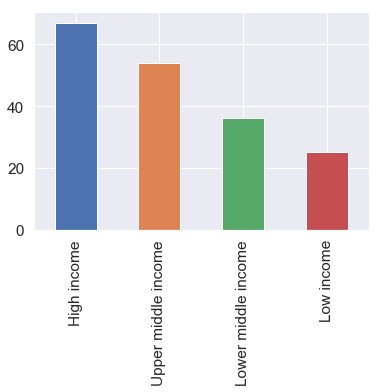

In [57]:
# plot bar graph of number of countries in each of the income groups
sns.set(font_scale=1.4)
df['IncomeGroup'].value_counts().plot(kind='bar')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries');

In [58]:
import matplotlib as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot

In [59]:
from pandas import DataFrame

In [60]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [62]:
for col in df.columns: 
    print(col)

Region
IncomeGroup
Country Name
Agriculture 
Education 
Expenses
Exports
Health
Imports
Industry_Construction
Military
RandD
Trade
latitude
longitude
Income_Group_cat


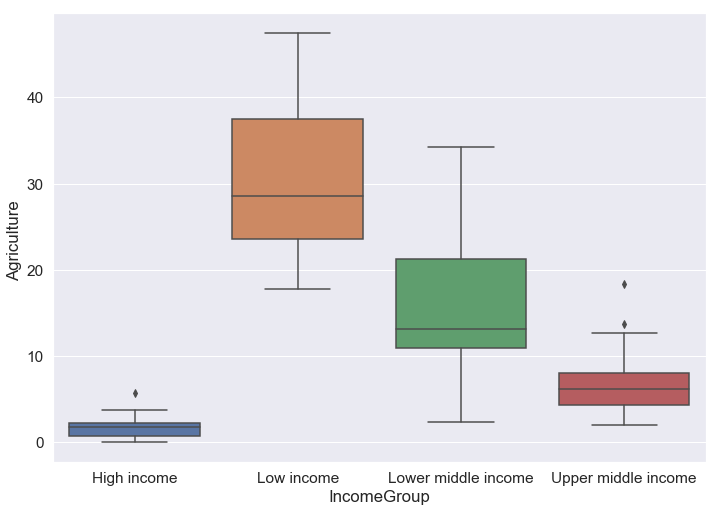

In [63]:
# box plot agriculture by income groups 
sns.boxplot(x='IncomeGroup', y='Agriculture ', data=df)

In [94]:
# box plot education by income groups
ed = sns.boxplot(x='IncomeGroup', y='Education', data=df)

ValueError: Could not interpret input 'Education'

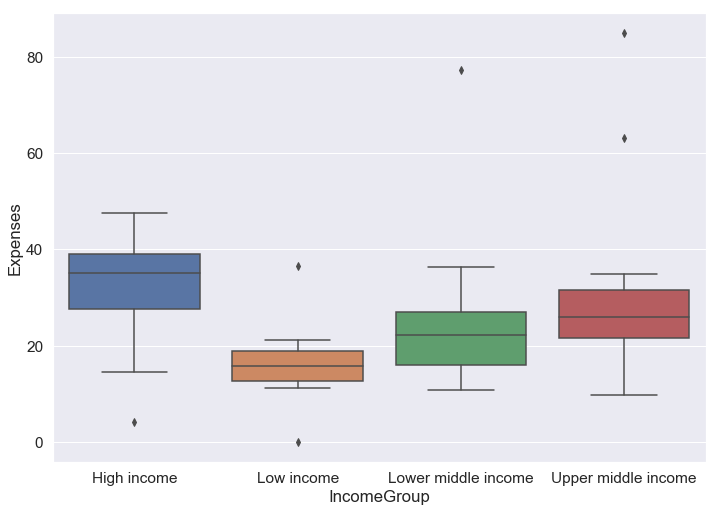

In [65]:
# box plot expenses by income groups
sns.boxplot(x='IncomeGroup', y='Expenses', data=df)

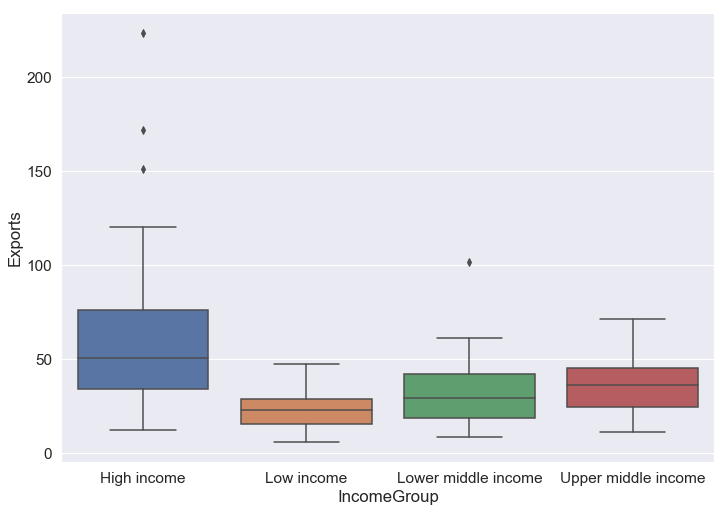

In [66]:
# box plot exports by income groups
sns.boxplot(x='IncomeGroup', y='Exports', data=df)

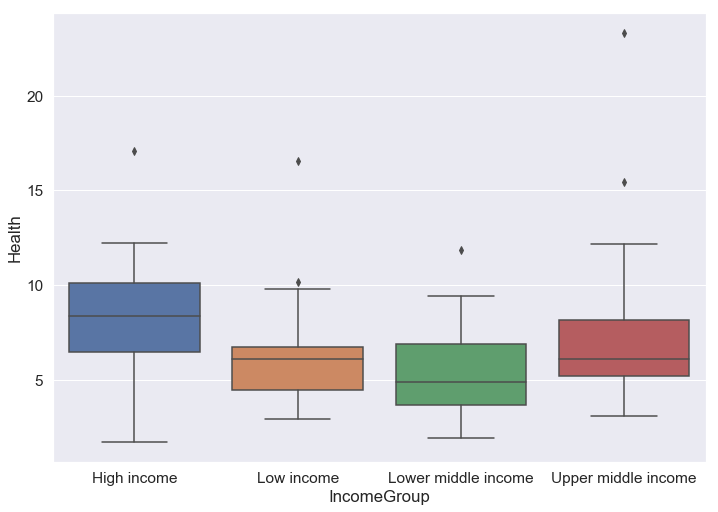

In [67]:
# box plot health by income groups
sns.boxplot(x='IncomeGroup', y='Health', data=df)

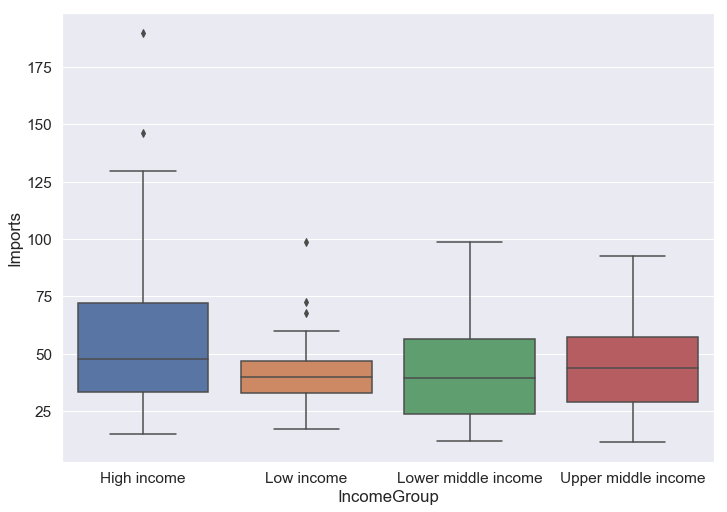

In [68]:
# box plot imports by income groups
sns.boxplot(x='IncomeGroup', y='Imports', data=df)

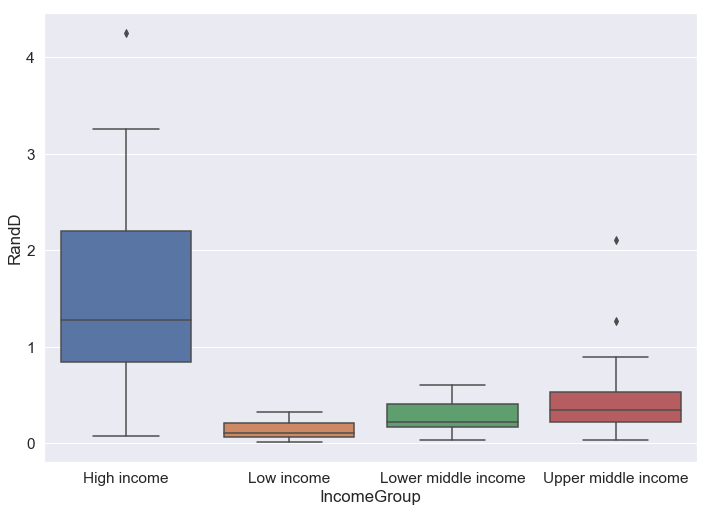

In [69]:
# box plot research and development by income groups
sns.boxplot(x='IncomeGroup', y='RandD', data=df)

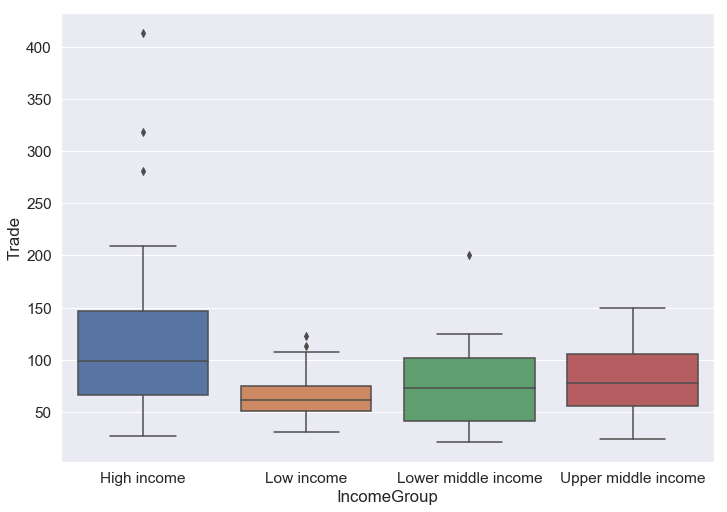

In [70]:
# box plot trade by income groups
sns.boxplot(x='IncomeGroup', y='Trade', data=df)

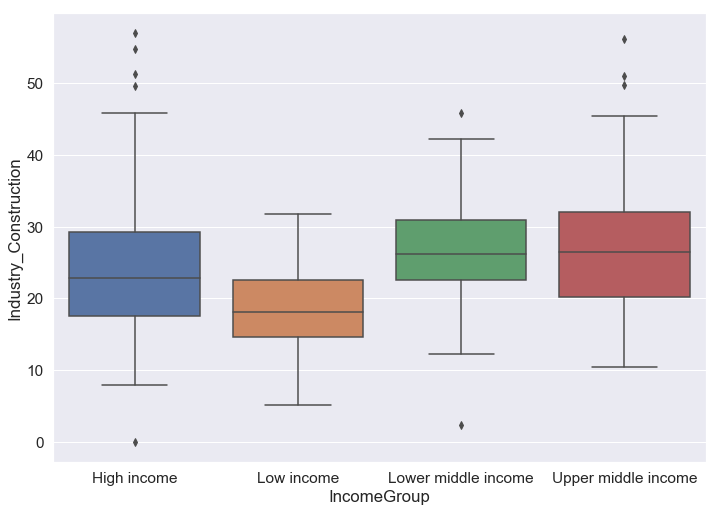

In [71]:
# box plot trade by income groups
sns.boxplot(x='IncomeGroup', y='Industry_Construction', data=df)

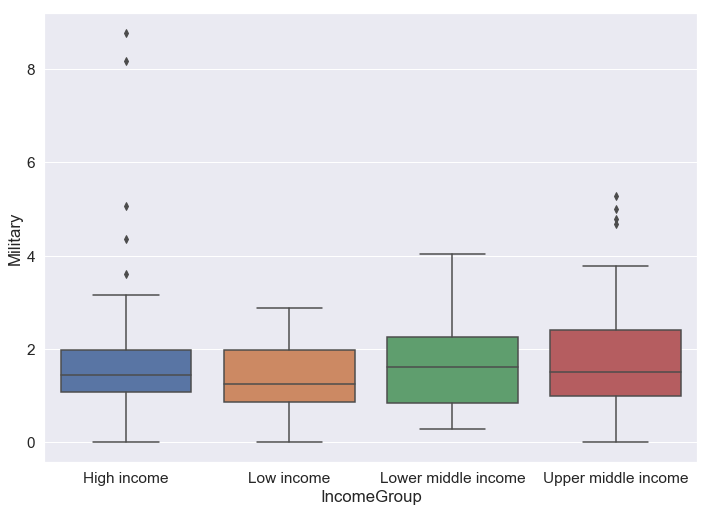

In [72]:
# box plot trade by income groups
sns.boxplot(x='IncomeGroup', y='Military', data=df)

C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


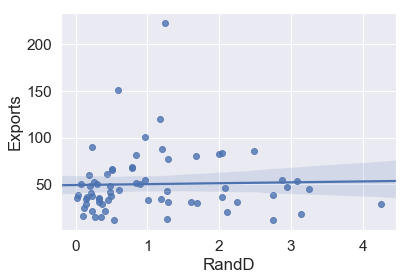

In [95]:
sns.regplot(x='RandD', y= 'Exports', data=df)

In [ ]:
Imports
Industry_Construction
Military
RandD
Trade


C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


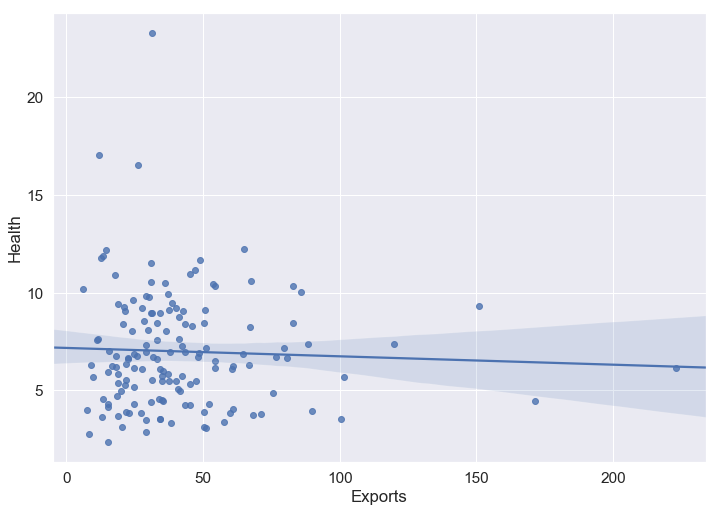

In [73]:
sns.regplot(x='Exports', y= 'Health', data=df)

In [ ]:
Region
IncomeGroup
Country Name
Agriculture 
Education
Expenses
Exports
Health
Imports
Industry_Construction
Military
RandD
Trade

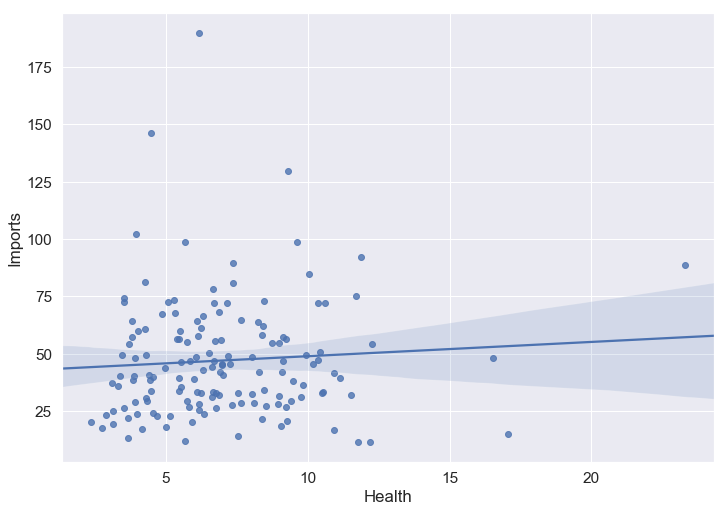

In [74]:
sns.regplot(x='Health', y='Imports', data=df)

In [75]:
# Encode income group column by turning it into a category 
df['IncomeGroup'] = df['IncomeGroup'].astype('category') 
df.dtypes

C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Region                     object
IncomeGroup              category
Country Name               object
Agriculture               float64
Education                 float64
Expenses                  float64
Exports                   float64
Health                    float64
Imports                   float64
Industry_Construction     float64
Military                  float64
RandD                     float64
Trade                     float64
latitude                  float64
longitude                 float64
Income_Group_cat            int64
dtype: object

In [76]:
# Create a codes for the Income Group category
code = {'Low income':1,
       'Lower middle income':2,
       'Upper middle income':3,
       'High income':4}

In [77]:
# change regions variable into categories 
df['Region'] = df['Region'].astype('category')

C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
# encode Regions 
df['Region_Cat'] = df['Region'].cat.codes

C:\Users\wn236\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
from sklearn.linear_model import LinearRegression 

In [80]:
# create linear regression object
lm= LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
import seaborn as sns
%matplotlib inline

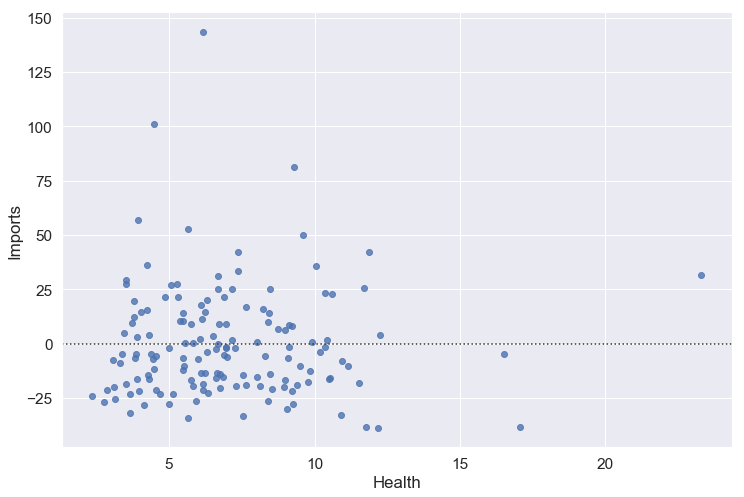

In [82]:
# plot to visualize education as a predictor of income 
width = 12 
height = 8 
plt.figure(figsize=(width,height))
sns.residplot(df['Health'], df['Imports'])

In [83]:
# create a Pandas Excel writer using  XlsxWriter 

export_csv = df.to_csv (r'C:\\Users\\wn236\\Data_science\\Final_project\\Combined.csv', index = None, header=True) 


## SIMPLE REGRESSION MODEL 
The goal in this section is to see if we can be able to predict the countries income group based on a single variable 

In [84]:
# Create train and test dataset  
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

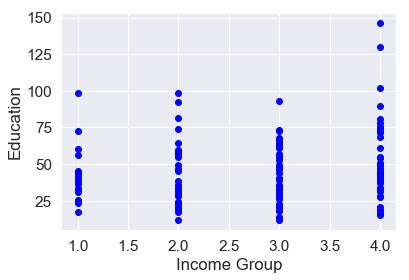

In [85]:
# Train data distribution 
plt.scatter(train.Income_Group_cat, train.Imports, color='blue')
plt.xlabel('Income Group')
plt.ylabel('Education')
plt.show()

#### Modelling 

In [93]:
# Using sklearn package to model data 
from sklearn import linear_model 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Income_Group_cat']])
train_y = np.asanyarray(train[['Region_Cat']])
regr.fit(train_x, train_y)

# The coefficients 
print('Coefficient: ', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficient:  [[-1.17362329]]
Intercept: [5.9403718]


In [224]:
from geopy 
gn = geocoders.GeoNames()

ModuleNotFoundError: No module named 'geopy'

## Foursquare searches 

In [97]:
# import necessary libraries

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\wn236\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0
  geopy              conda-forge/noarch::geopy-1.20.0-py_0




geographiclib-1.49   | 32 KB     |            |   0% 
geographiclib-1.49   | 32 KB     | ####9      |  50% 
geographiclib-1.49   | 32 KB     | #########9 |  99% 
geographiclib-1.49   | 32 KB     | ########## | 100% 

geo

In [98]:
# Define my foursquare credentials 
# @ hidden cell 
CLIENT_ID = '5LF3C42N1NUBGTAIXCJEOTF0YHE2BH5DJSAJTPFXWDKAMNXF' # your Foursquare ID
CLIENT_SECRET = 'PHWX5L324PRFHSXGCBAX2MJWTSBFNZNEKGUGJO5KMCNHWBZE' # your Foursquare Secret
VERSION = '20190828'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5LF3C42N1NUBGTAIXCJEOTF0YHE2BH5DJSAJTPFXWDKAMNXF
CLIENT_SECRET:PHWX5L324PRFHSXGCBAX2MJWTSBFNZNEKGUGJO5KMCNHWBZE


In [99]:
latitude = 0
longitude = 0

In [101]:
# Lets visualize the locations 
venues_map = folium.Map(location=[latitude, longitude], zoom_start=5) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for latitude, longitude, label in zip(df.latitude, df.longitude, df.IncomeGroup):
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [102]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d81357ed03d290038628f09'},
 'response': {'venues': []}}

In [103]:
# Check if any countries are trending at this time
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)